In [1]:
# process mining 
# from pm4py.algo.discovery.alpha import algorithm as alpha_miner
# from pm4py.algo.discovery.inductive import algorithm as inductive_miner
# from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.algo.discovery.footprints import algorithm as footprints_discovery


# viz
# from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.footprints import visualizer as fp_visualizer
# from pm4py.visualization.transition_system import visualizer as ts_visualizer
# from pm4py.visualization.process_tree import visualizer as pt_visualizer
# from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
# from pm4py.objects.petri_net.utils import reachability_graph
# from pm4py.objects.conversion.process_tree import converter as pt_converter

import pm4py

In [26]:
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter

# Read the CSV file and parse the timestamps
events = pd.read_csv('interval_event_log_with_artificial_resources.csv', sep=',', parse_dates=['endtime', 'starttime'])

# Rename columns to match the expected format
events.rename(columns={
    'endtime': 'time:timestamp',
    'starttime': 'start_timestamp',
    'orderID': 'case:concept:name',
    'activity': 'concept:name',
    'resource': 'org:resource'
}, inplace=True)

# Convert to log format
log = log_converter.apply(events)

In [27]:
# start activities
log_start = pm4py.get_start_activities(log)
log_start

{'place order': 1266}

In [4]:
# end activities
end_activities = pm4py.get_end_activities(log)
end_activities

{'confirm payment': 895, 'make delivery': 230, 'cancel order': 141}

In [5]:
# traces
variants = pm4py.get_variants_as_tuples(log)
print(len(variants))
variants

9


{('place order',
  'send invoice',
  'pay',
  'prepare delivery',
  'make delivery',
  'confirm payment'): [{'attributes': {'concept:name': 'C1'}, 'events': [{'concept:name': 'place order', 'time:timestamp': '2015-01-05 09:02:50+00:00', 'start_timestamp': '2015-01-05 09:00:07+00:00', 'org:resource': 'HLJOP'}, '..', {'concept:name': 'confirm payment', 'time:timestamp': '2015-01-22 12:35:56+00:00', 'start_timestamp': '2015-01-22 12:31:22+00:00', 'org:resource': 'ZBEXO'}]},
  {'attributes': {'concept:name': 'C2'}, 'events': [{'concept:name': 'place order', 'time:timestamp': '2015-01-05 10:54:11+00:00', 'start_timestamp': '2015-01-05 10:18:21+00:00', 'org:resource': 'EXXRY'}, '..', {'concept:name': 'confirm payment', 'time:timestamp': '2015-01-22 15:23:33+00:00', 'start_timestamp': '2015-01-22 15:15:20+00:00', 'org:resource': 'RCEUC'}]},
  {'attributes': {'concept:name': 'C4'}, 'events': [{'concept:name': 'place order', 'time:timestamp': '2015-01-05 14:16:11+00:00', 'start_timestamp': '201

In [6]:
# activities
activities = pm4py.get_event_attribute_values(log, "concept:name")
print(activities)

{'place order': 1266, 'send invoice': 1266, 'pay': 1125, 'prepare delivery': 1125, 'make delivery': 1125, 'confirm payment': 1125, 'send reminder': 936, 'cancel order': 141}


In [7]:
# resources
resources = pm4py.get_event_attribute_values(log, "org:resource")
print(resources)

{'HLJOP': 399, 'RCEUC': 390, 'BALPA': 440, 'RLTSN': 420, 'ZBEXO': 374, 'EXXRY': 396, 'FWWWF': 420, 'VXRUO': 402, 'FGXWW': 427, 'DTZWY': 458, 'UYDRD': 416, 'EMEYV': 382, 'VNOHU': 384, 'UTBDH': 398, 'RWVYG': 411, 'LYVGB': 418, 'KYICA': 395, 'KXHUV': 373, 'EQRLD': 404, 'SMSNY': 402}


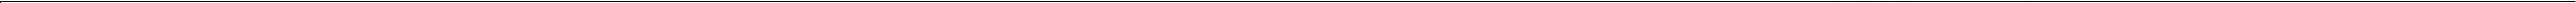

In [13]:
# dotted chart visualization
pm4py.view_dotted_chart(log)

In [9]:
# traces with activities carried out multiple times
rework = pm4py.get_rework_cases_per_activity(log)
rework

{'send reminder': 316}

In [10]:
# footprint analysis
fp_log = footprints_discovery.apply(log, variant=footprints_discovery.Variants.ENTIRE_EVENT_LOG)
fp_log

{'dfg': Counter({('place order', 'send invoice'): 1258,
          ('pay', 'prepare delivery'): 1117,
          ('prepare delivery', 'make delivery'): 895,
          ('make delivery', 'confirm payment'): 895,
          ('send invoice', 'pay'): 638,
          ('send invoice', 'send reminder'): 620,
          ('send reminder', 'pay'): 479,
          ('send reminder', 'send reminder'): 316,
          ('prepare delivery', 'confirm payment'): 230,
          ('confirm payment', 'make delivery'): 230,
          ('send reminder', 'cancel order'): 141,
          ('place order', 'pay'): 8,
          ('pay', 'send invoice'): 8,
          ('send invoice', 'prepare delivery'): 8}),
 'sequence': {('pay', 'prepare delivery'),
  ('place order', 'pay'),
  ('place order', 'send invoice'),
  ('prepare delivery', 'confirm payment'),
  ('prepare delivery', 'make delivery'),
  ('send invoice', 'prepare delivery'),
  ('send invoice', 'send reminder'),
  ('send reminder', 'cancel order'),
  ('send reminder', '

In [11]:
## Footprint table

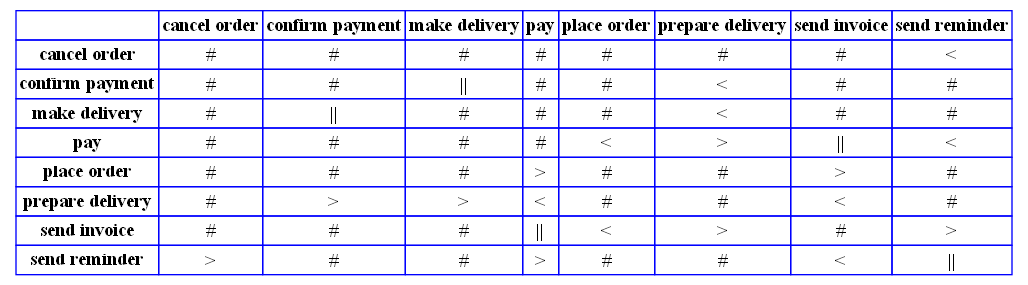

In [16]:
# caution: arrows mean "causality" here NOT "follows"
gviz = fp_visualizer.apply(fp_log)
fp_visualizer.view(gviz)

In [ ]:
### Directly-follows graph

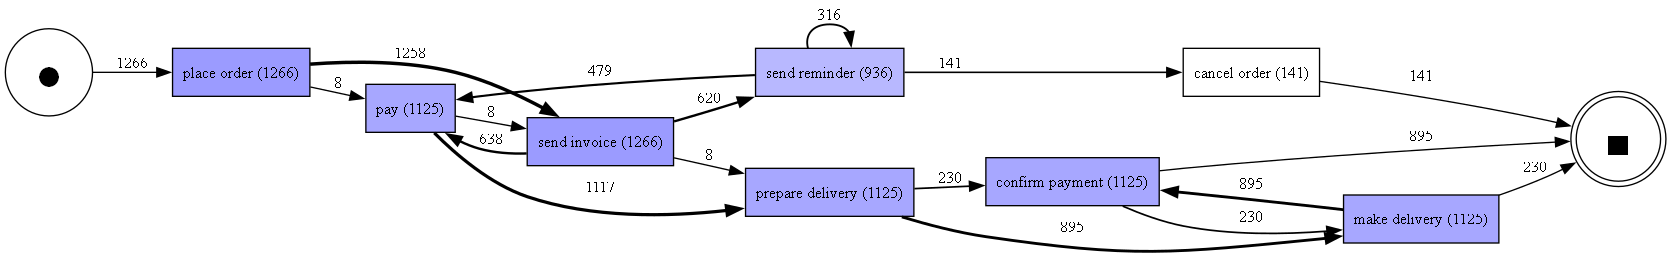

In [29]:
# Create graph from log (annotated with frequency)
dfg = dfg_discovery.apply(log)
pm4py.vis.view_dfg(dfg, log_start, end_activities)

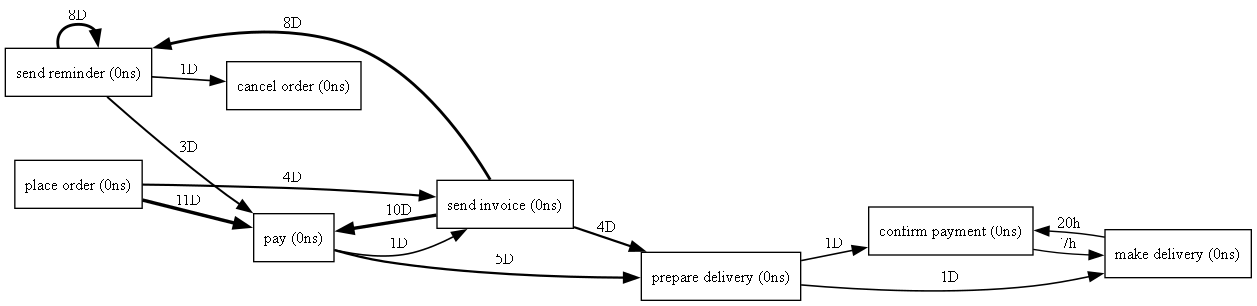

In [28]:
# Create graph from log (annotated with time)
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)

# Visualize the DFG
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)